In [374]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
df=pd.read_csv("D:\\Mars Rover Manipal\\Car Prices\\CarPrice_Assignment.csv")
df.set_index('car_ID', inplace=True)
df

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0


In [375]:
df['cylindernumber']=df['cylindernumber'].replace({'three':0,'eight':1,'five':2,'four':3,'six':4,'two':5,'twelve':6})
df['fueltype']=df['fueltype'].replace({'diesel':0,'gas':1})
df['aspiration']=df['aspiration'].replace({'turbo':1,'std':0})
X = df.drop(['CarName','price','enginelocation','doornumber','drivewheel','carbody','enginetype','fuelsystem'],axis=1) 
y = df['price']
for i in X.T:
    mean=X.mean()
    std=X.std()
    X=(X-mean)/std
X

,symboling,fueltype,aspiration,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
car_ID,,,,,,,,,,,,,,,,,
1,1.739213,0.327995,-0.468149,-1.686643,-0.425480,-0.842719,-2.015483,-0.014531,-0.081509,0.074267,0.517804,-1.834886,-0.287645,0.174057,-0.262318,-0.644974,-0.544725
2,1.739213,0.327995,-0.468149,-1.686643,-0.425480,-0.842719,-2.015483,-0.014531,-0.081509,0.074267,0.517804,-1.834886,-0.287645,0.174057,-0.262318,-0.644974,-0.544725
3,0.133183,0.327995,-0.468149,-0.706865,-0.230948,-0.190101,-0.542200,0.513625,1.437517,0.602571,-2.399008,0.684271,-0.287645,1.261448,-0.262318,-0.950684,-0.689938
4,0.936198,0.327995,-0.468149,0.173274,0.206750,0.136209,0.235366,-0.419770,-0.081509,-0.430023,-0.516003,0.461055,-0.035885,-0.053537,0.785932,-0.186409,-0.109087
5,0.936198,0.327995,-0.468149,0.106848,0.206750,0.229440,0.235366,0.515545,-1.600534,0.218350,-0.516003,0.461055,-0.539405,0.275209,0.785932,-1.103540,-1.270789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,-1.472847,0.327995,-0.468149,1.717669,1.195622,1.394830,0.726460,0.761377,-0.081509,0.338419,1.662375,-0.336147,-0.161765,0.249921,0.576282,-0.339264,-0.399512
202,-1.472847,0.327995,2.125651,1.717669,1.195622,1.348215,0.726460,0.947672,-0.081509,0.338419,1.662375,-0.336147,-0.363173,1.413178,0.366632,-0.950684,-0.835151
203,-1.472847,0.327995,-0.468149,1.717669,1.195622,1.394830,0.726460,0.876611,1.437517,1.106861,0.923942,-1.229012,-0.337997,0.755685,0.785932,-1.103540,-1.125577


In [376]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [382]:
w = np.zeros(X.shape[1])
b=0
alpha = 0.08
epoch = 1000
n = float(len(X))
loss = []

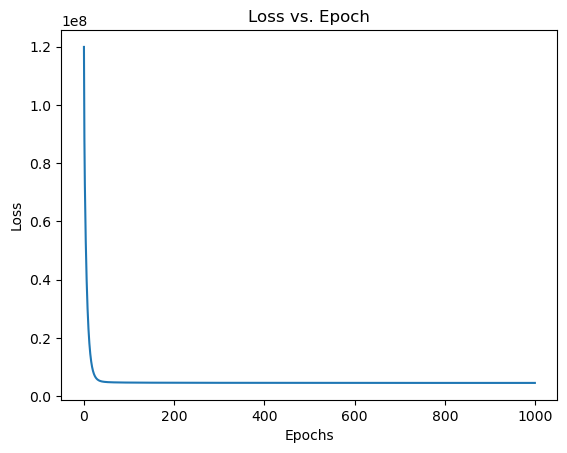

             Feature  Coefficient
0          symboling   311.695231
1           fueltype  -954.710613
2         aspiration  -208.910838
3          wheelbase  1015.765861
4          carlength  -883.685794
5           carwidth   596.818650
6          carheight   290.010007
7         curbweight   935.805888
8     cylindernumber  -505.548354
9         enginesize  4561.558679
10         boreratio  -334.228763
11            stroke  -981.275884
12  compressionratio   421.548915
13        horsepower  1748.162121
14           peakrpm  1105.501303
15           citympg -1565.702400
16        highwaympg   871.036759
Intercept (b): 13276.710570731697


In [383]:
for i in range(epoch):
    y_pred = np.dot(X, w) +b
    error = (1 / (2 * n)) * np.sum((y_pred - y) ** 2)
    dw = (1 / n) * np.dot((y_pred - y), X)
    db = (1 / n) * np.sum(y_pred - y)
    w = w - alpha * dw
    b = b - alpha * db
    loss.append(error)
    
epoch_r = range(epoch)

plt.plot(epoch_r, loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs. Epoch')
plt.show()

wt=np.array([w])
feature_names = X.columns
weights = pd.DataFrame({'Feature':feature_names, 'Coefficient': wt[0]})
print(weights)
print("Intercept (b):", b)

In [379]:
predict = np.dot(X_test, w)
y_mean = y_test.mean()
tss = ((y_test - y_mean) ** 2).sum()
rss = ((y_test - predict) ** 2).sum()
r_squared = 1 - (tss / rss)

print("R-squared (R²) value:",r_squared)

R-squared (R²) value: 0.5929711522801628
